> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

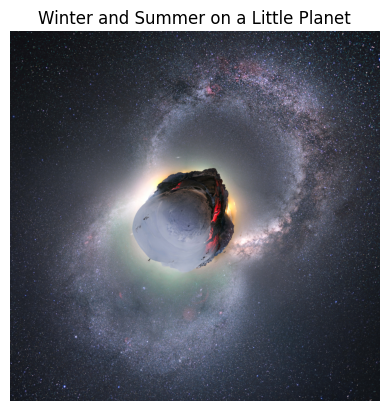

Copyright: Camille Niel 
 Explicação: Winter and summer appear to come on a single night to this stunning little planet. It's planet Earth of course. The digitally mapped, nadir centered panorama covers 360x180 degrees and is composed of frames recorded during January and July from the Col du Galibier in the French Alps. Stars and nebulae of the northern winter (bottom) and summer Milky Way form the complete arcs traversing the rugged, curved horizon. Cars driving along on the road during a summer night illuminate the 2,642 meter high mountain pass, but snow makes access difficult during winter months except by serious ski touring. Cycling fans will recognize the Col du Galibier as one of the most famous climbs in planet Earth's Tour de France.


In [11]:
import json
import requests
from skimage import io
import matplotlib.pyplot as plt


with open("key.json", "r") as fp:
    key=json.load(fp)
BASE_URL = "https://api.nasa.gov/planetary/apod"

queryp = {
    'api_key' : key['API_KEY']
}

res= requests.get(BASE_URL, params=queryp)
res_json=res.json()
url = res_json.get('hdurl') 
title = res_json.get('title', 'Imagem da NASA')


img = io.imread(url)
plt.imshow(img)
plt.title(title)
plt.axis("off")
plt.show()
print(f"Copyright: {res_json["copyright"]} \n Explicação: {res_json['explanation']}")

#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [12]:
print(f"Limite total de requisições (X-RateLimit-Limit): {res.headers.get('X-RateLimit-Limit')}")
print(f"Limite restante de requisições (X-RateLimit-Remaining): {res.headers.get('X-RateLimit-Remaining')}")

Limite total de requisições (X-RateLimit-Limit): 2000
Limite restante de requisições (X-RateLimit-Remaining): 1816


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [ ]:
import json
import requests


URL_BASE = "https://api.nasa.gov/mars-photos/api/v1/manifests/curiosity/"

response = requests.get(URL_BASE, params=queryp)
print(f"Erro: Status code {response.status_code}")
res_json = response.json()
print("res:", res_json)
photo = res_json["photo_manifest"]
print(F"Máximo dia marciano: {photo['max_sol']} \n Última data terrestre: {photo['max_date']}")

#ERRO 500

Erro: Status code 500


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



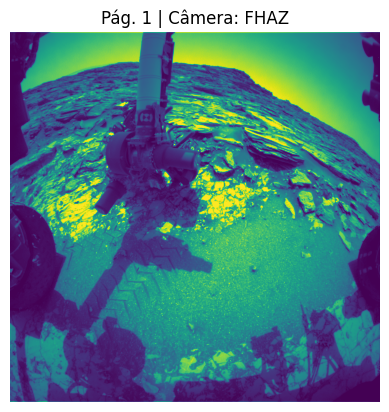

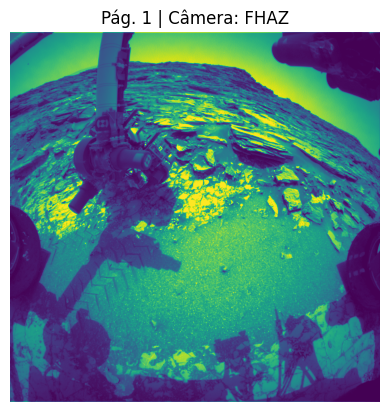

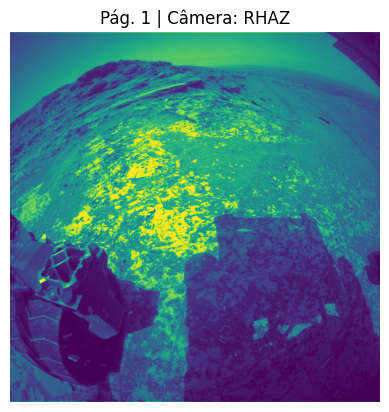

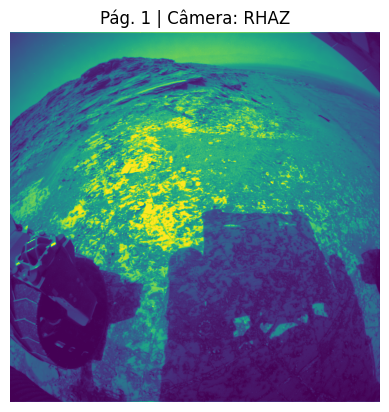

KeyboardInterrupt: 

In [ ]:
import json
import requests
import matplotlib.pyplot as plt
from skimage import io

with open("key.json", "r") as fp:
    key=json.load(fp)


api_key = key['API_KEY']


sol = 1000 
page = 1 

def obter_fotos(sol, page, api_key):
    url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
    params = {
        'sol': sol,
        'page': page,
        'api_key': api_key
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erro: Status code {response.status_code}")
        return None


def exibir_imagens(fotos):
    for foto in fotos:
        img_url = foto['img_src']
        img = io.imread(img_url)
        plt.imshow(img)
        plt.title(f"Pág. {page} | Câmera: {foto['camera']['name']}")
        plt.axis('off')
        plt.show()

while True:
    fotos_data = obter_fotos(sol, page, api_key)
    
    if fotos_data and 'photos' in fotos_data and fotos_data['photos']:
        fotos = fotos_data['photos']
        exibir_imagens(fotos)
        page += 1
    else:
        print("Não há mais fotos.")
        break

#ERRO DE INTERRUPÇÃO PRO ARQUIVO NÃO FICAR GIGANTE